# Ejercicios 7



#### 1. Carga de datos

[Movilens Dataset](http://grouplens.org/datasets/movielens/) recoge datos de 6000 usuarios y 4000  películas. Un total de 1.000.000 de entradas. La información se distribuye en 3 tablas.

- ratings.dat - El fichero recoge datos de valoraciones  de los usuarios
- movies.dat - Datos de las películas
- users.dat - Datos personales de los usuarios


Toda esta información se utiliza con mucha frecuencia en los sistemas de recomendación que aplican algoritmos de aprendizaje.



Pasos a seguir:

__Paso 1__. Descargar los siguientes ficheros de datos en el directorio de trabajo.

[users](./ml-1m/users.dat)

[movies](./ml-1m/movies.dat)

[ratings](./ml-1m/ratings.dat)

__Paso 2__. Crear un DataFrame para cada uno de los ficheros.  Usar la función head() para visualizar los primeros datos.

* Los dataframes han de llamarse: `usuarios`, `peliculas` y `valoraciones`.
* Con respecto a la carga del fichero ratings (tenéis la instrucción de carga más abajo): 
    * tiene un campo de tipo fecha expresado en segundos. 
    * Indica en la función __read_csv__ que vas a parsear esa columna como una fecha.
    * Utiliza la función __datetime.fromtimestamp__ para parsear las fechas.  Para ello tendrás que indicarlo en el parámetro __date_parser__ de la función __read_table__.

In [47]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

ruta_ratings = './ml-1m/ratings.dat'   # AQUÍ PONER LA RUTA DEL FICHERO
ruta_movies = './ml-1m/movies.dat'
ruta_users = './ml-1m/users.dat' # Se escribe la ruta de los otros dos dicheros restantes


In [14]:
# Sol apartado 1:

from datetime import datetime
dateparse = lambda x: datetime.fromtimestamp(float(x))

valoraciones = pd.read_csv(ruta_ratings, sep = '::', header = None,
                         names = ['id_usuario', 'id_peli', 'puntuacion', 'Fecha'],
                         engine ='python',
                         parse_dates=[3], date_parser=dateparse)
                         

valoraciones.head()

,id_usuario,id_peli,puntuacion,Fecha
0,1,1193,5,2000-12-31 23:12:40
1,1,661,3,2000-12-31 23:35:09
2,1,914,3,2000-12-31 23:32:48
3,1,3408,4,2000-12-31 23:04:35
4,1,2355,5,2001-01-07 00:38:11


In [15]:
peliculas = pd.read_csv(ruta_movies, 
                        sep = '::', 
                        header = None,
                        names = ['id_peli', 'Titulo', 'Genero'],
                        engine ='python')
peliculas.head()

,id_peli,Titulo,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
usuarios = pd.read_csv(ruta_users, 
                       sep = '::', 
                       header = None,
                       names = ['id_usuario', 'Genero', 'Edad', 'Puesto', 'CP'],
                       engine ='python')
usuarios.head()

,id_usuario,Genero,Edad,Puesto,CP
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


#### 2. Diagrama de Frecuencias

Los usuarios valoran las películas con valores del 1 al 5 donde el 1 es la peor puntuación y 5 es la mejor. La puntuación es una variable categórica. 
Representa mediante un diagrama de Frecuencias (tipo hist) la frecuencia de los votos de la película con título __X-Men (2000)__.

El gráfico que tienes que construir debe tener el siguiente aspecto:

![Diagrama](mi_diagrama.png)

__Notas:__

* El título de la película está en el dataframe __películas__.

In [17]:
peliculas[peliculas.Titulo == 'X-Men (2000)'] # buscamos la pelicula y su ID

,id_peli,Titulo,Genero
3724,3793,X-Men (2000),Action|Sci-Fi


In [21]:
valoraciones[valoraciones.id_peli == 3793].head(10) 

# Desde aqui se puede acceder a las puntuaciones de los diferentes usuarios

,id_usuario,id_peli,puntuacion,Fecha
276,5,3793,2,2000-12-31 07:12:50
527,7,3793,3,2000-12-31 04:52:17
700,9,3793,4,2000-12-31 02:19:41
1734,17,3793,4,2000-12-30 07:44:49
1950,18,3793,5,2000-12-30 06:12:26
2258,19,3793,4,2000-12-31 22:56:12
2853,23,3793,4,2001-01-02 19:33:05
3285,25,3793,4,2000-12-30 00:08:03
3843,28,3793,4,2001-01-08 20:30:33
3947,29,3793,1,2000-12-30 01:27:02


In [24]:
valoraciones[valoraciones.id_peli == 3793]['puntuacion'].head(25) 

# Esto son las 25 primeras puntuaciones para la pelicula 'X-Men (2000)'

276     2
527     3
700     4
1734    4
1950    5
2258    4
2853    4
3285    4
3843    4
3947    1
5030    4
5521    4
5711    4
5934    4
5964    4
6524    3
7110    3
7220    3
7261    4
7394    5
8199    4
8981    3
9514    2
9611    4
9987    5
Name: puntuacion, dtype: int64

In [25]:
X_Men_Puntuaciones = valoraciones[valoraciones.id_peli == 3793]['puntuacion']

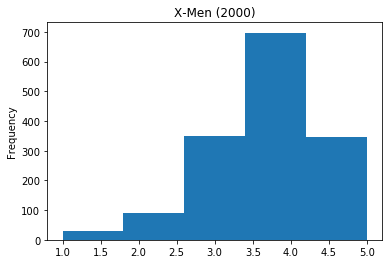

In [63]:
X_Men_Puntuaciones.plot(kind = 'hist',
                       bins = 5,
                       title = 'X-Men (2000)',
                       x = 'Valoraciones');

#### 3. Puntuación media

Calcula la puntuación media  de cada película por sexo del usuario. Diseña una función llamada __puntuacion_media__ que devuelve un Dataframe donde el índice es el título de la película y las columnaa son 'F' y 'M' (Female y Male respectivamente).

__Nota__:
Hay varias formas de hacerlo. Aquí os dejo alguna sugerencia:
* Necesitamos combinar las tres tablas ya que tenemos, por un lado las valoraciones, por otro el título de la película y por otro el sexo de los usuarios. La operación merge te permitirá realizar la  combinación
    * Combina primero las valoraciones con las peliculas por el campo 'id_peli'.
    * Combina el resultado anterior con los usuarios por el campo 'id_usuario'.
    
* Una vez combinadas las tres tablas en una sola tabla:
    * solución 1:  Agrupar por id_peli y por sexo del usuario. La función de agregación es la media mean(). Para obtener la tabla pedida utiliza `unstack` para deshacer el multi índice.
    * solución 2: Consulta la ayuda de la función __pivot_table__. Utiliza la función __pivot_table__. Esta no la hemos visto en la teoría, pero es muy interesante y útil. Merece la pena que intentéis resolverlo también utilizando esta opción.


In [26]:
# Sol:
def puntuacion_media():
    """Calcula la puntuación media  de cada película por sexo del usuario
    
    Example:
        >>> puntuacion_media()
        genero_u                            F          M
        titulo 
        $1,000,000 Duck (1971)       3.375000    2.761905
        'Night Mother (1986)         3.388889    3.352941
        'Til There Was You (1997)    2.675676    2.733333

"""

In [64]:
Merge1 = pd.merge(valoraciones, peliculas, 
                  on = ['id_peli'], 
                  how = 'left')
Merge1.head() # Combina primero las valoraciones con las peliculas por el campo 'id_peli'.

,id_usuario,id_peli,puntuacion,Fecha,Titulo,Genero
0,1,1193,5,2000-12-31 23:12:40,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 23:35:09,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,2000-12-31 23:32:48,My Fair Lady (1964),Musical|Romance
3,1,3408,4,2000-12-31 23:04:35,Erin Brockovich (2000),Drama
4,1,2355,5,2001-01-07 00:38:11,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [65]:
Merge2 = pd.merge(Merge1, usuarios, 
                  on = ['id_usuario'], 
                  how = 'left')
Merge2.head() # Combina el resultado anterior con los usuarios por el campo 'id_usuario'.

,id_usuario,id_peli,puntuacion,Fecha,Titulo,Genero_x,Genero_y,Edad,Puesto,CP
0,1,1193,5,2000-12-31 23:12:40,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,2000-12-31 23:35:09,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,2000-12-31 23:32:48,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,2000-12-31 23:04:35,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,2001-01-07 00:38:11,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [ ]:
# Solución 1:
# Agrupar por id_peli y por sexo del usuario.
# La función de agregación es la media mean(). 
# Para obtener la tabla pedida utiliza unstack para deshacer el multi índice.

In [70]:
MediaPuntuaciones = Merge2.groupby(['Titulo', 'Genero_y']).mean().unstack().puntuacion

# Al tener dos 'Generos', uno de sexo y otro de clasificacion de pelicula, hay que indicar que quiero agrupar por sexo.
# Genero_y = Masculino o Femenino

In [71]:
MediaPuntuaciones.head(10)

Genero_y,F,M
Titulo,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


#### 4. Mejor valoradas por mujeres

Ahora queremos conocer las películas mejor valoradas por las mujeres. Crea una función llamada __mejor_valoradas_mujeres__. Utiliza el dataFrame devuelto por la función __puntuacion_media__ del apartado anterior y devuelve un DataFrame ordenado de forma apropiada. 

__Nota__:

* Utiliza la función __sort_values__ para ordenar los resultados.

In [ ]:
# Sol: 
def mejor_valoradas_mujeres(data):
    """ Calcula las películas mejor valoradas por las mujeres
    Args:
         @type data: dataframe             

    Returns: 
        @rtype: dataframe
    
    Examples:
     >>> mejor_valoradas_mujeres(data)
     genero_u                                               F           M
     titulo
        Clean Slate (Coup de Torchon) (1981)         5.000000    3.857143
        Ballad of Narayama, The (Narayama Bushiko)   5.000000    3.428571
        Raw Deal (1948)                              5.000000    3.307692
        Bittersweet Motel (2000)                     5.000000    NaN
        Skipped Parts (2000)                         5.000000    4.000000
        Lamerica (1994)                              5.000000    4.666667

In [74]:
def mejor_valoradas_mujeres(data):
    data = data.sort_values('F', ascending = False) 
    # Ordena los valores de la columna F de forma descendente (mayores primero)
    return (data) 

In [75]:
mejor_valoradas_mujeres(MediaPuntuaciones)

Genero_y,F,M
Titulo,,
Clean Slate (Coup de Torchon) (1981),5.000000,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.000000,3.428571
Raw Deal (1948),5.000000,3.307692
Bittersweet Motel (2000),5.000000,NaN
Skipped Parts (2000),5.000000,4.000000
Lamerica (1994),5.000000,4.666667
"Gambler, The (A J�t�kos) (1997)",5.000000,3.166667
"Brother, Can You Spare a Dime? (1975)",5.000000,3.642857
Ayn Rand: A Sense of Life (1997),5.000000,4.000000
